In [1]:
# Display plots in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [121]:
import pylab as pl
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from matplotlib import cm

# Make plots prettyful
pl.style.use('fivethirtyeight')

What is your age?Do you know how to touch-type on a physical keyboard?,Did you learn / Are you learning to touch-type in school?,"If you do not know how to touch-type, do you plan to learn?",Did/Does your school offer typing lessons?,Do you care about having the ability to touch-type?,Can you type on a touchscreen keyboard without looking?

In [54]:
def convert(val):
    if val == 'No':
        return 0
    elif val == 'Yes':
        return 1
    else:
        return float('nan')

In [55]:
csv = pd.read_csv('typing.csv')

csv['agestart'] = csv.age.str.split('-').str.get(0).str.strip()
csv['agestart'][csv['agestart'] == '60+'] = '60'
csv['agestart'] = csv['agestart'].astype(float)

for col in ['physical', 'school', 'plantolearn', 'lessons', 'care', 'touchscreen']:
    csv[col] = csv.apply(lambda x: convert(x[col]), axis=1)

In [56]:
csv.head()

,age,physical,school,plantolearn,lessons,care,touchscreen,agestart
0,22 - 30,0.0,0.0,0.0,0.0,0.0,1.0,22.0
1,22 - 30,1.0,0.0,0.0,1.0,1.0,1.0,22.0
2,31 - 40,1.0,1.0,NaN,1.0,1.0,1.0,31.0
3,31 - 40,1.0,0.0,NaN,1.0,1.0,1.0,31.0
4,22 - 30,1.0,0.0,NaN,0.0,1.0,0.0,22.0


In [59]:
mod = smf.ols(formula='touchscreen ~ C(physical) + C(agestart)', data = csv).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            touchscreen   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     15.89
Date:                Wed, 18 May 2016   Prob (F-statistic):           2.01e-20
Time:                        10:23:49   Log-Likelihood:                -1393.5
No. Observations:                1995   AIC:                             2803.
Df Residuals:                    1987   BIC:                             2848.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               0.5069    

In [53]:
csv['physical'].shape

(2000,)

In [68]:
mod = smf.ols(formula='physical ~ C(lessons) + C(school) + C(care) + agestart', data = csv).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               physical   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 18 May 2016   Prob (F-statistic):          6.07e-121
Time:                        10:29:43   Log-Likelihood:                -960.68
No. Observations:                1980   AIC:                             1931.
Df Residuals:                    1975   BIC:                             1959.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept             0.2208      0.02

In [66]:
csv['touchscreen'].mean()

0.4954954954954955

In [90]:
bars = []

bars.append(('Cares', csv[csv['care'] == 1].mean()['physical']))
bars.append(('Doesn\'t Care', csv[csv['care'] == 0].mean()['physical']))

bars.append(('School Offered Lessons', csv[csv['lessons'] == 1].mean()['physical']))
bars.append(('School Didn\'t Offer Lessons', csv[csv['lessons'] == 0].mean()['physical']))

bars.append(('Care + Lessons', csv[(csv['care'] == 1) & (csv['lessons'] == 1)].mean()['physical']))
bars.append(('!Care + Lessons', csv[(csv['care'] == 0) & (csv['lessons'] == 1)].mean()['physical']))
bars.append(('Care + !Lessons', csv[(csv['care'] == 1) & (csv['lessons'] == 0)].mean()['physical']))

In [96]:
bars.sort(key=lambda x: x[1])
bars

[("Doesn't Care", 0.34606741573033706),
 ('!Care + Lessons', 0.39378238341968913),
 ("School Didn't Offer Lessons", 0.60388945752302969),
 ('Care + !Lessons', 0.70718232044198892),
 ('School Offered Lessons', 0.81411530815109345),
 ('Cares', 0.81624758220502902),
 ('Care + Lessons', 0.91379310344827591)]

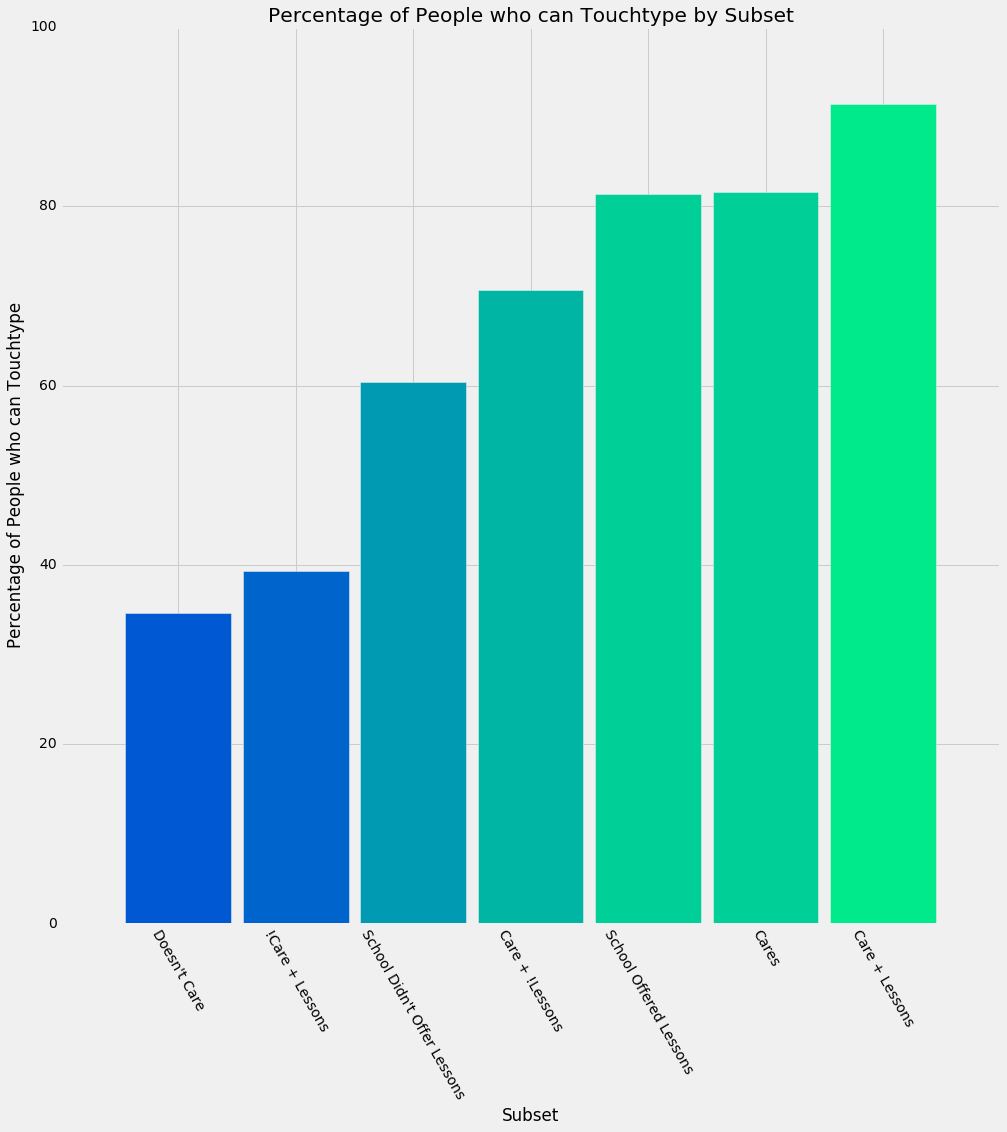

In [132]:
width = .9
figure, ax = pl.subplots(figsize=(15,15))
values = [i[1]*100 for i in bars]
ax.bar(range(len(bars)), values, width, color=[cm.winter(i/100) for i in values], align='center')

ax.set_xticks(np.arange(len(bars)))
ax.set_xticklabels([i[0] for i in bars],  rotation=300)

ax.set_xlabel('Subset')
ax.set_ylabel('Percentage of People who can Touchtype')
ax.set_title('Percentage of People who can Touchtype by Subset')